Customer diagnostic analysis

![Customer segmentation analysis](https://www.corporatevision-news.com/wp-content/uploads/2022/10/Customer-Segmentation.jpg)

1. Data collection-

In this project, I chose to focus on customer segmentation for supermarkets, a dynamic and expanding sector. By examining customer demographics and purchasing behaviors, I can gain valuable insights into how different customer groups influence sales and profitability. This analysis is crucial for refining marketing strategies and enhancing customer engagement, making it especially useful for supermarkets looking to optimize their operations.

The (CSV) dataset that I analysed in this project comes from [Aung Pyae](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales). This project is focused on Tableau for visualization and SQL server mangagement studio for querying, cleaning and extracting data, so firstly I used SQL server data import wizard feature to import the CSV to a schema, then I ran some querys to preview the data to identify what would be the ideal key insights to extract, and identify the necessary data cleaning steps to ensure effective insights extraction.

In [1]:
# loads pandas library
import pandas as pd

# reads the data
df = pd.read_csv ('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')

# previews the data
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


First I selected the table design to view the column names and data types

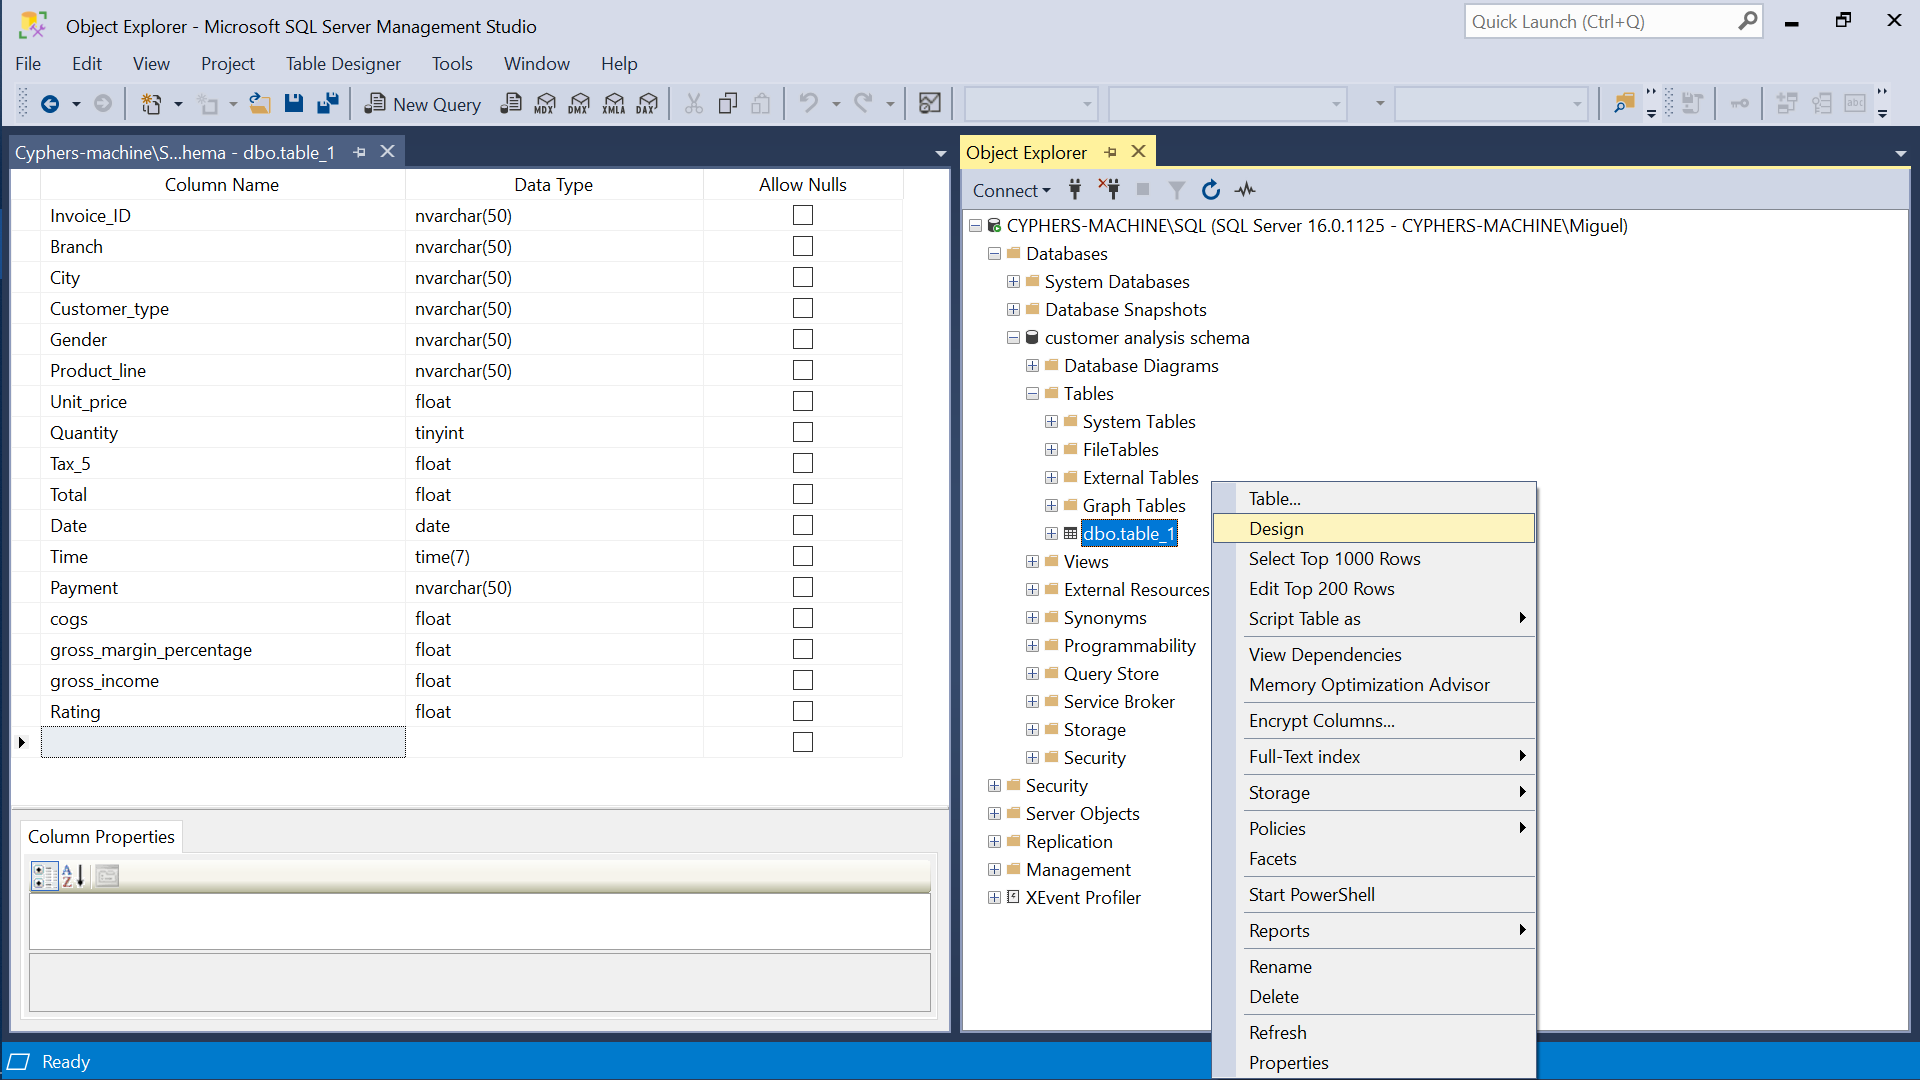

In [2]:
from IPython.display import Image, display

# Path to the image
img_path = '/kaggle/input/mssqlserver/Column names.png'

# Display the image
display(Image(filename=img_path))

Then I used the query below to count the number of rows and columns

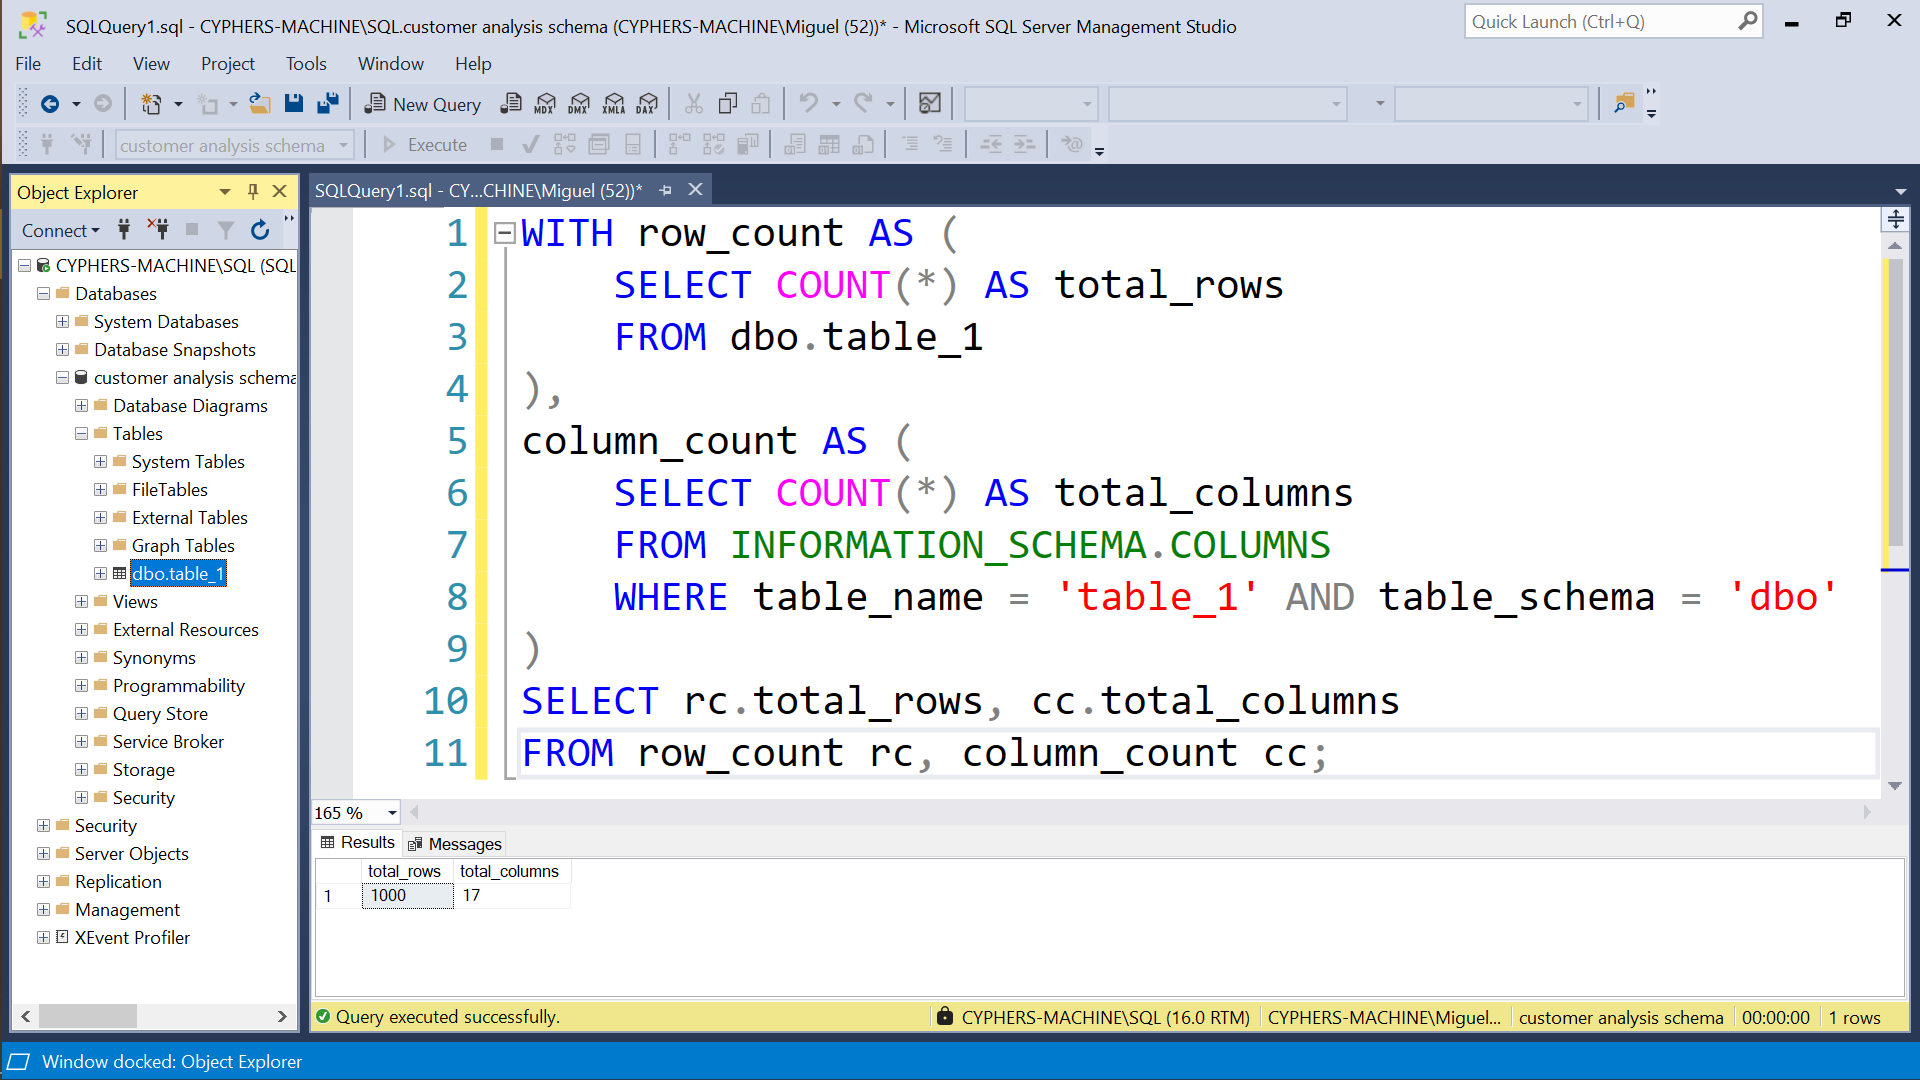

In [3]:
from IPython.display import Image, display

# Path to the image
img_path = '/kaggle/input/mssqlserver/shape.png'

# Display the image
display(Image(filename=img_path))


>What this preview tells us about this data frame-

1. There are 1, 000 rows and 17 columns.

2. The columns in the datasets are: Invoice_ID, Branch, City, Customer_type, Gender, Product_line, Unit_price, Quantity, Tax_5, Total, Date, Time, Payment, cogs, gross_margin_percentage, gross_income, Rating

3. The data types of the columns are appropriate for this analysis.

2. Defining the problems/ goals-

Looking at this data (primarily the columns), the ideal key insights to extract would be-

1.What are the sales trends over time by product line? 
 - Aggregate total sales and analyze trends for different product lines over time.
 
2.What is the average purchase amount and frequency by customer type and gender? 
 - Compute average transaction value and count of transactions for each customer type and gender.
 
3.Which product lines or branches have the highest profit margins? 
 - Calculate profit margins (gross margin as a percentage of total) for each product line and branch to find the highest ones.
 
4.How does the payment method impact the average transaction value? 
 - Compare average transaction values across different payment methods to determine if there are significant differences.

3. Data cleaning-

This data is fairly clean, it just needs proper formatting, and a "staging" copy of the original table for data integrity and to prevent data loss. So without wasting any time at all, I went straight through this data analysis process.

Here I checked for any duplicate rows with-

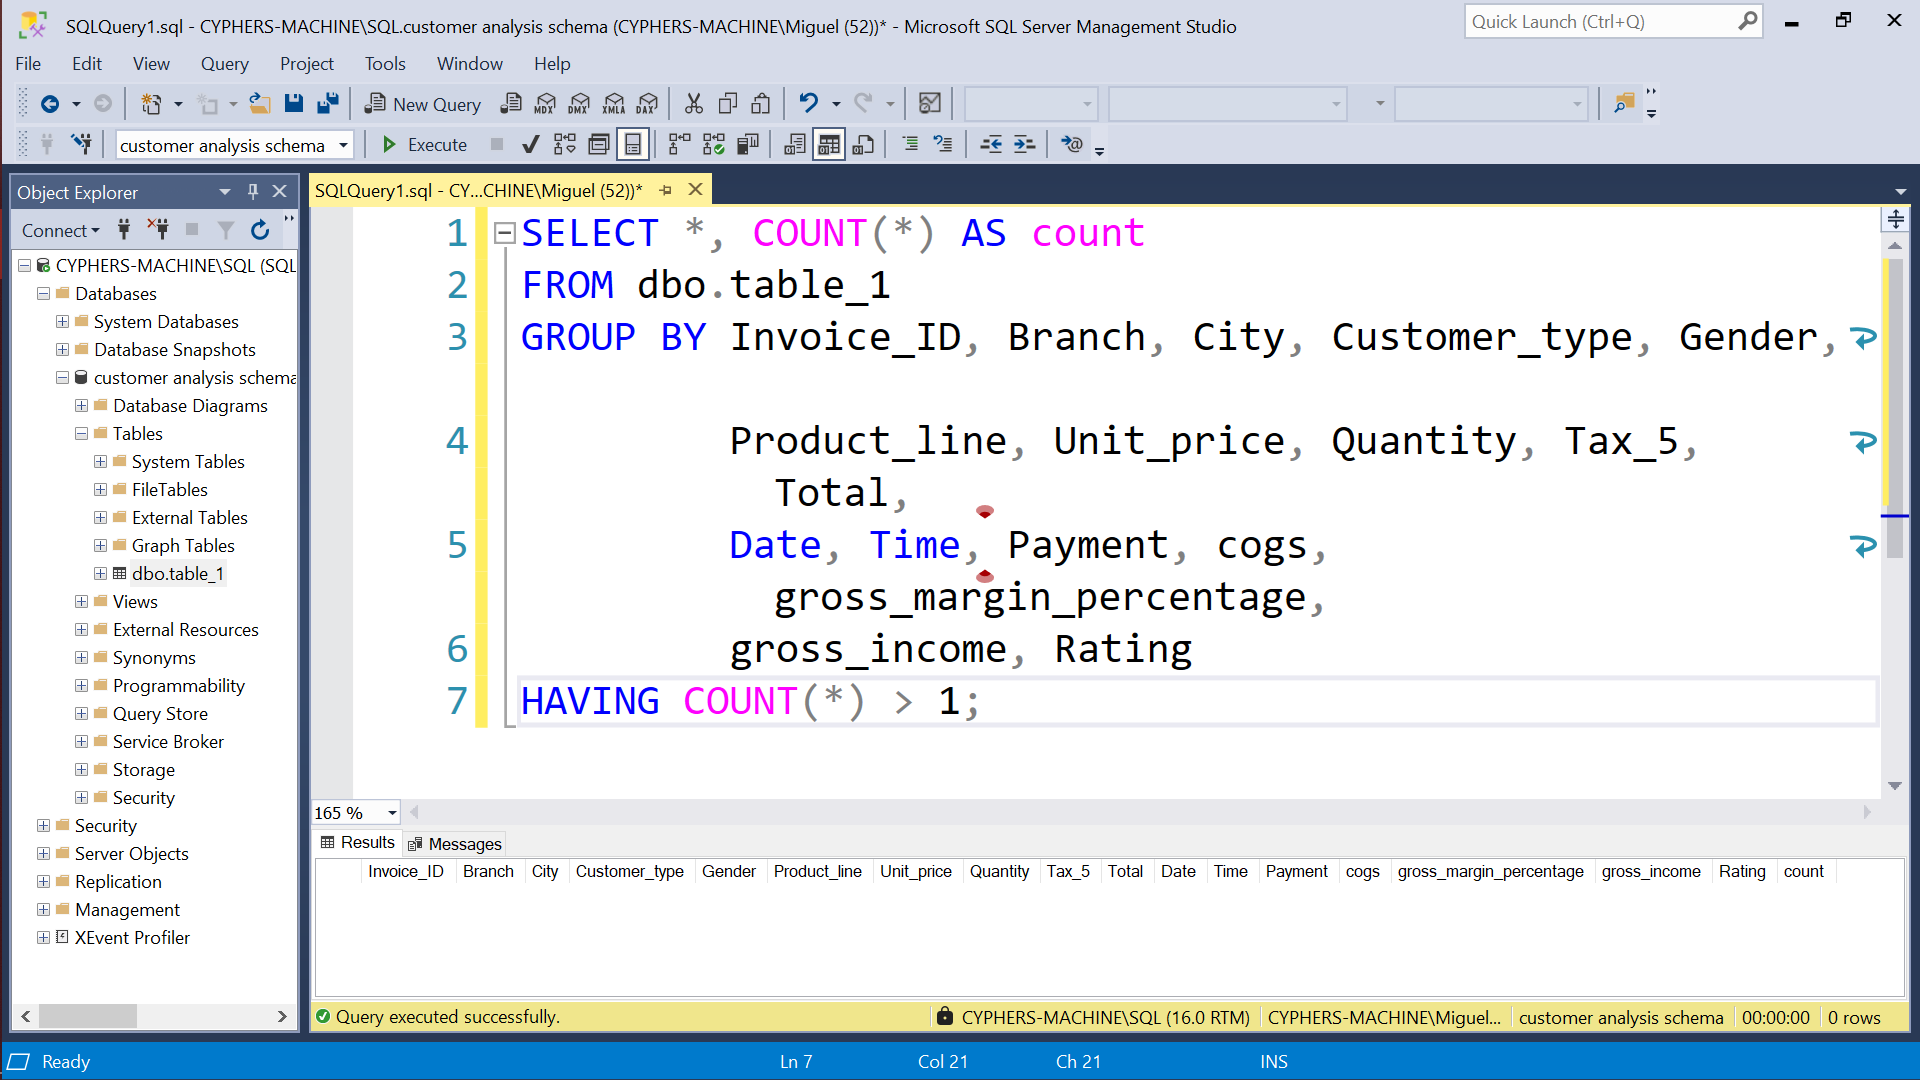

In [4]:
from IPython.display import Image, display

# Path to the image
img_path = '/kaggle/input/mssqlserver/dups.png'

# Display the image
display(Image(filename=img_path))

The result is empty therefore there are no duplicates

Here I checked for null values

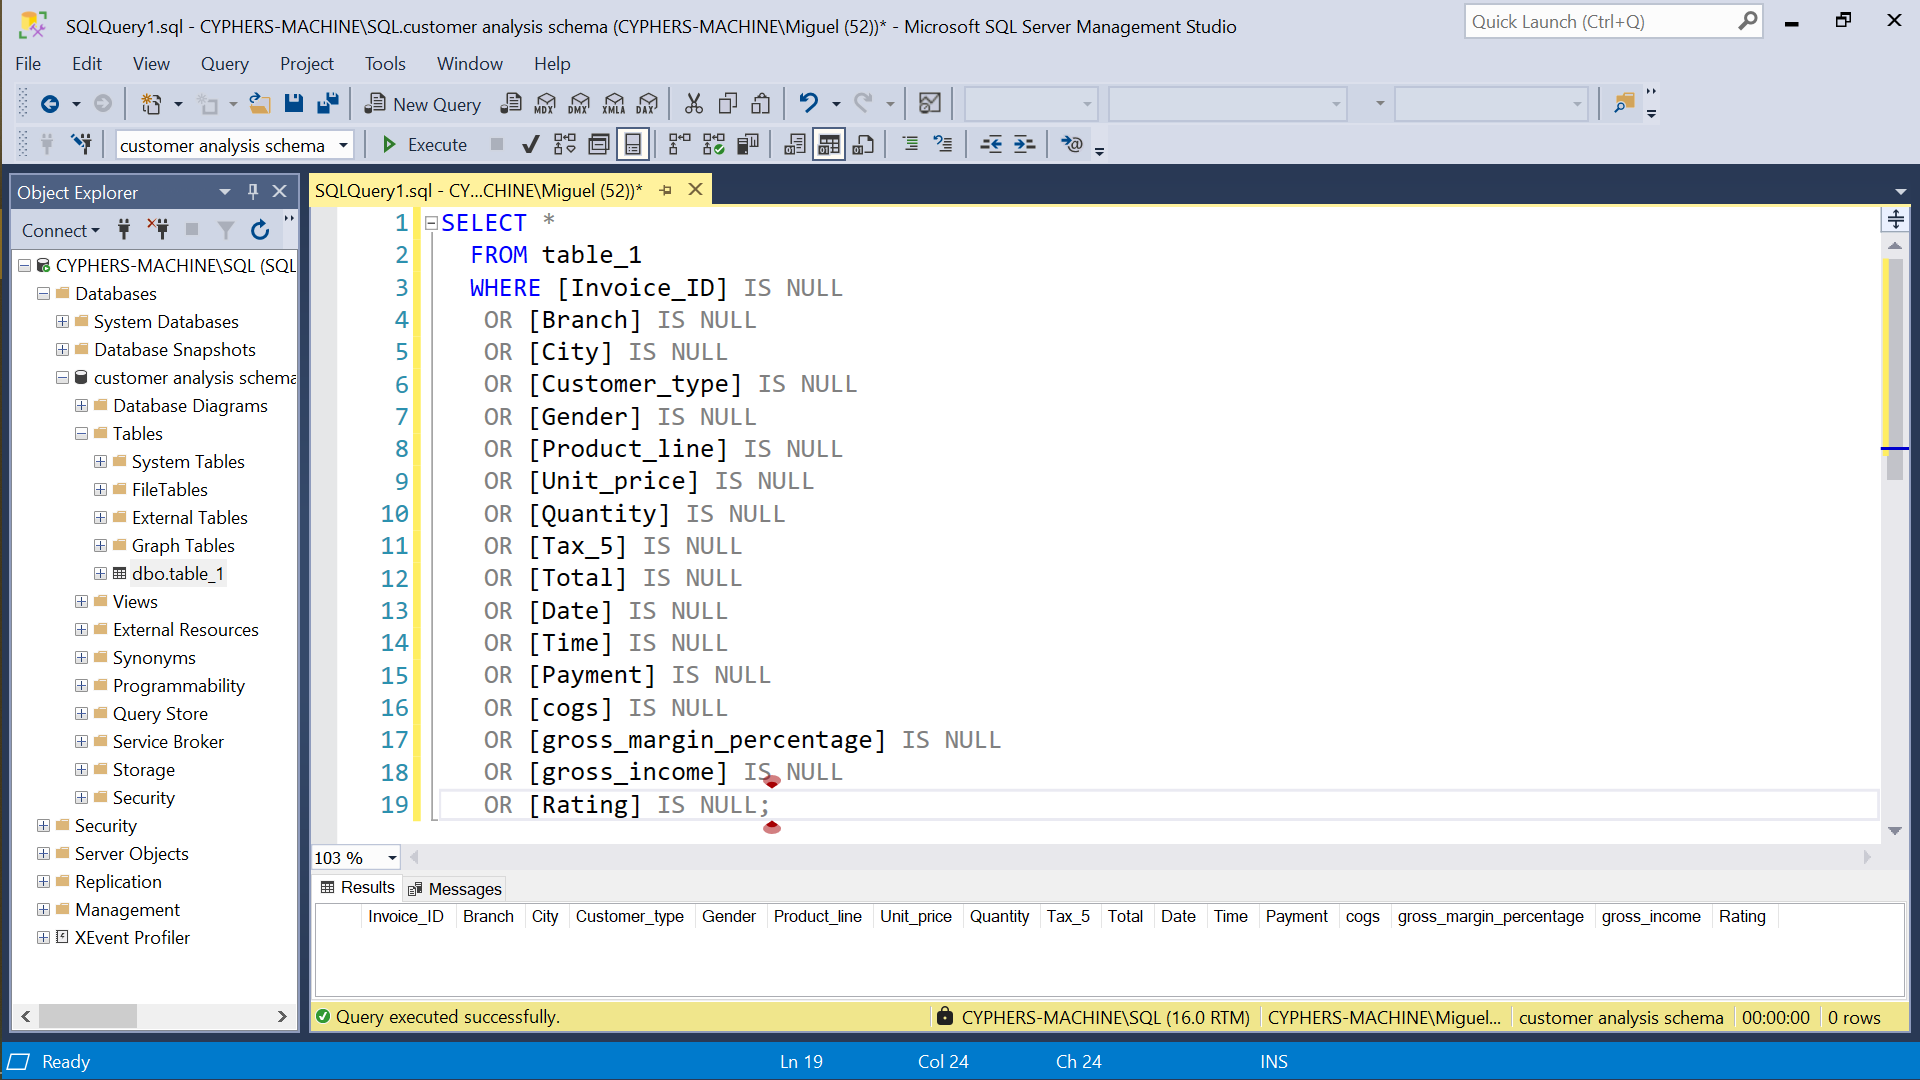

In [5]:
from IPython.display import Image, display

# Path to the image
img_path = '/kaggle/input/mssqlserver/Null.png'

# Display the image
display(Image(filename=img_path))

An empty dataset returned therefore there are no null values

Not all the columns will be used to extract data so first I created a "staging" copy of the original table, querying-

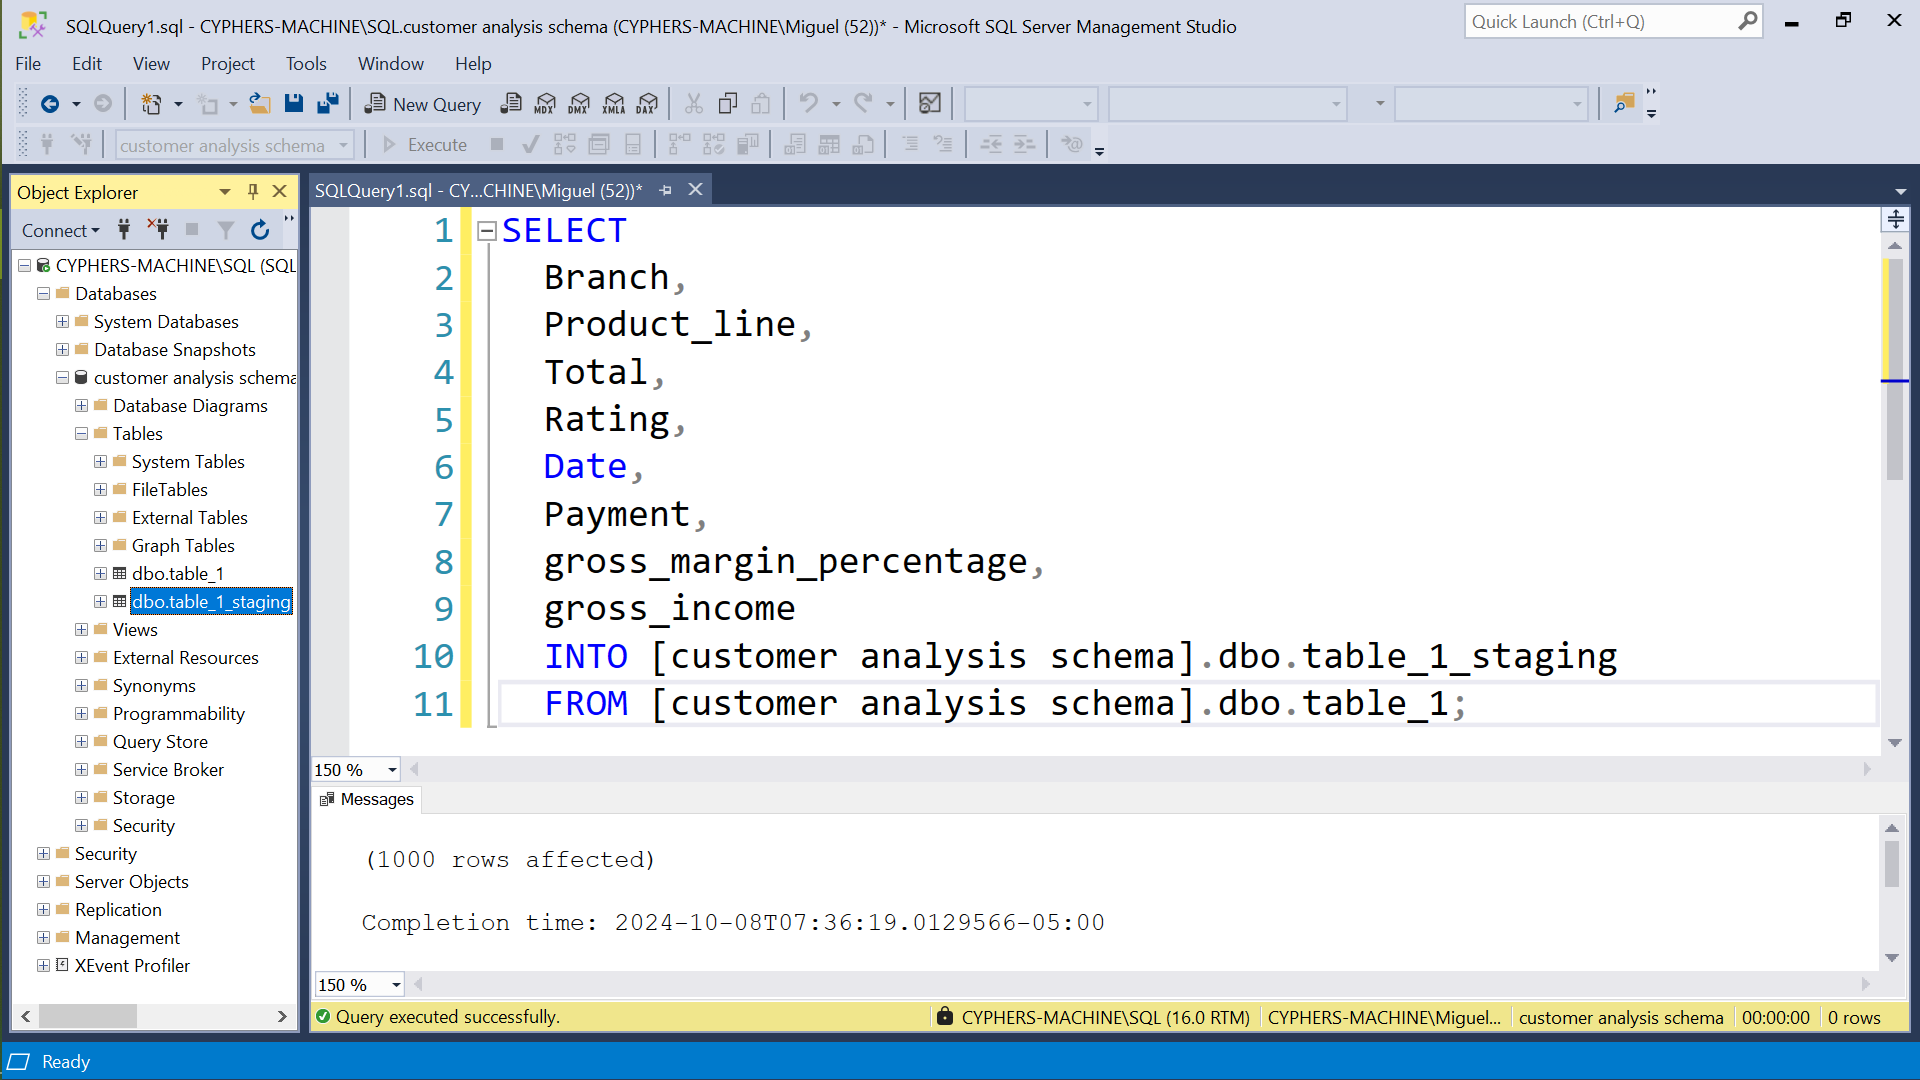

In [6]:
from IPython.display import Image, display

# Path to the image
img_path = '/kaggle/input/mssqlserver/staging.png'

# Display the image
display(Image(filename=img_path))

This create a copy of the original table with only the useful columns which are stated in the query.

In [7]:
# Reads the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/table-1-staging/table_1_staging.csv')

# Previews the DataFrame
df

,Branch,Product_line,Total,Rating,Date,Payment,gross_margin_percentage,gross_income
0,A,Health and beauty,548.971497,9.1,2019-01-05,Ewallet,4.761905,26.141500
1,C,Electronic accessories,80.220001,9.6,2019-03-08,Cash,4.761905,3.820000
2,A,Home and lifestyle,340.525513,7.4,2019-03-03,Credit card,4.761905,16.215500
3,A,Health and beauty,489.048004,8.4,2019-01-27,Ewallet,4.761905,23.288000
4,A,Sports and travel,634.378479,5.3,2019-02-08,Ewallet,4.761905,30.208500
...,...,...,...,...,...,...,...,...
995,C,Health and beauty,42.367500,6.2,2019-01-29,Ewallet,4.761905,2.017500
996,B,Home and lifestyle,1022.489990,4.4,2019-03-02,Ewallet,4.761905,48.689999
997,A,Food and beverages,33.431999,7.7,2019-02-09,Cash,4.761905,1.592000
998,A,Home and lifestyle,69.111000,4.1,2019-02-22,Cash,4.761905,3.291000


The data is now clean, the appropriate data types are set, that is;

Branch: nvarchar(50),
Rating: Float, 
Product_line: nvarchar(50), 
Total: float, 
date: date, 
Payment: nvarchar(50), 
gross_margin_percentage: float,
gross_income: float

I checked for duplicate entries, checked for null values, filtered out only the relevant columns into a copy table, and checked appropriate data types to the columns for proper use. Now I started extracting insights and visualize them.

4. Data analysis

First question-

1. **What are the sales trends over time by product line?**
 - Aggregate total sales and analyze trends for different product lines over time.


I ran this query to aggregate the columns

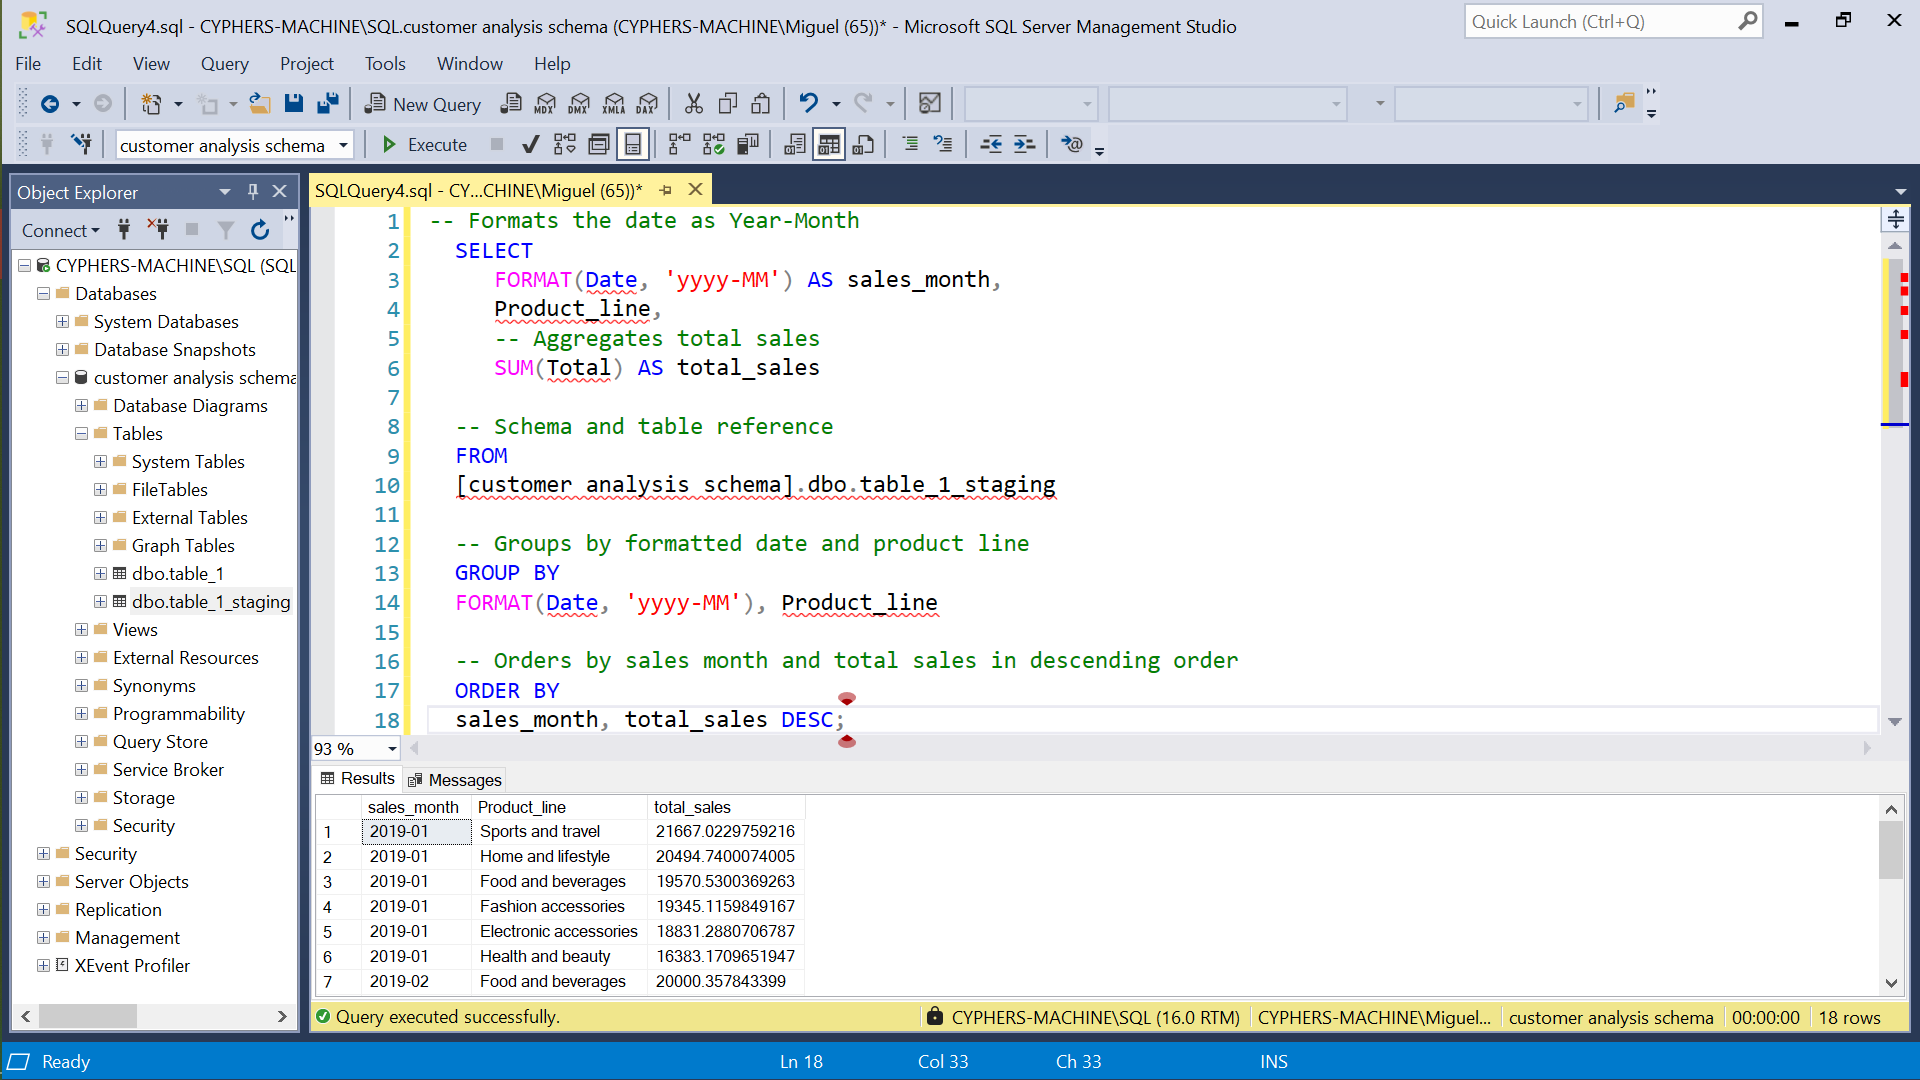

In [8]:
from IPython.display import Image, display

# Path to the image
img_path = '/kaggle/input/mssqlserver/Q1.png'

# Display the image
display(Image(filename=img_path))

[Product lines sales over time viz](https://public.tableau.com/views/CustomerdiagnosticSQLandTableauanalysis/Story1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

Conclusion

From the data on total sales across different product lines for the first three months of 2019, we can identify several key trends:

1. **Top Performing Product Lines:**
 - **Sports and Travel** consistently recorded high sales, peaking in January 2019 and maintaining strong performance throughout the quarter, showing a sustained demand in this category.
 - **Home and Lifestyle** also showed strong sales, particularly in March, where it had the highest total sales among all product lines.

2. **Product Lines with Steady Sales:**
 - **Food and Beverages** showed relatively consistent sales across the three months, though it experienced a slight drop in March compared to January and February.
 - **Fashion Accessories** remained stable but with a slight decline in March.

3. **Fluctuations in Sales:**
 - **Health and Beauty** saw notable fluctuations, with the highest sales in March but a dip in February. It suggests possible seasonal or promotional influences.
 - **Electronic Accessories** sales peaked in January and gradually declined by March, indicating reduced interest or market saturation.

Overall, the data reflects that **Sports and Travel** and **Home and Lifestyle** are the strongest performers, while **Health and Beauty** and **Electronic Accessories** experience more variability in sales.

Second question-

2. Which categories have the highest-rated products?
Investigate which product categories receive the highest ratings overall. This could help identify top-performing categories.

This query accomplishes this-

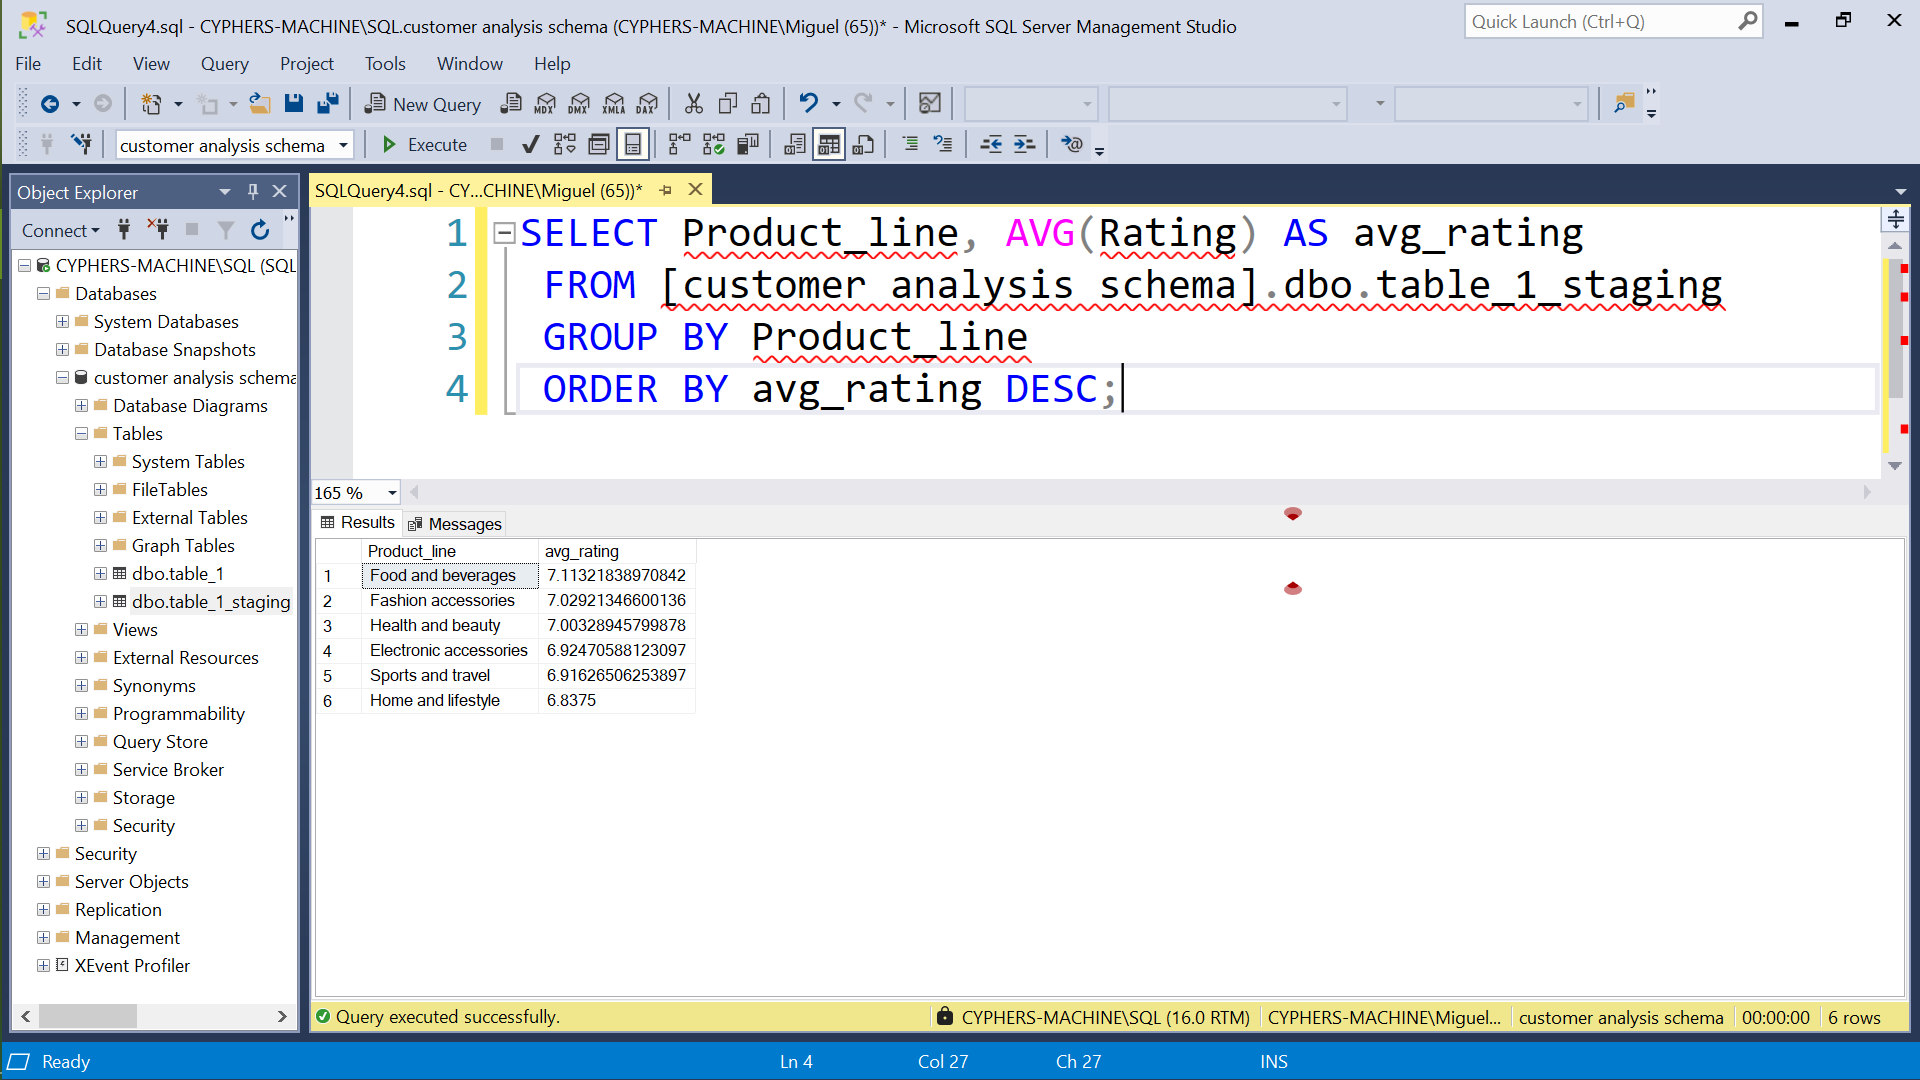

In [9]:
from IPython.display import Image, display

# Path to the image
img_path = '/kaggle/input/mssqlserver/Q2.png'

# Display the image
display(Image(filename=img_path))

[Average ratingg per product line viz](https://public.tableau.com/shared/S7N9Y9839?:display_count=n&:origin=viz_share_link)

Conclusion

 The top-rated product category is **Food and Beverages**, with an average rating of 7.11, indicating a strong customer preference for these products. **Fashion Accessories** and **Health and Beauty** also perform well, with average ratings of 7.03 and 7.00, respectively. While **Electronic Accessories** (6.92) and **Sports and Travel** (6.91) are slightly lower, they still maintain competitive ratings. These insights suggest that focusing on **Food and Beverages** and **Fashion Accessories** could yield the highest customer satisfaction.

Third question

3. **Which product lines or branches have the highest profit margins?**
 - Calculate profit margins (gross margin as a percentage of total) for each product line and branch to find the highest ones.

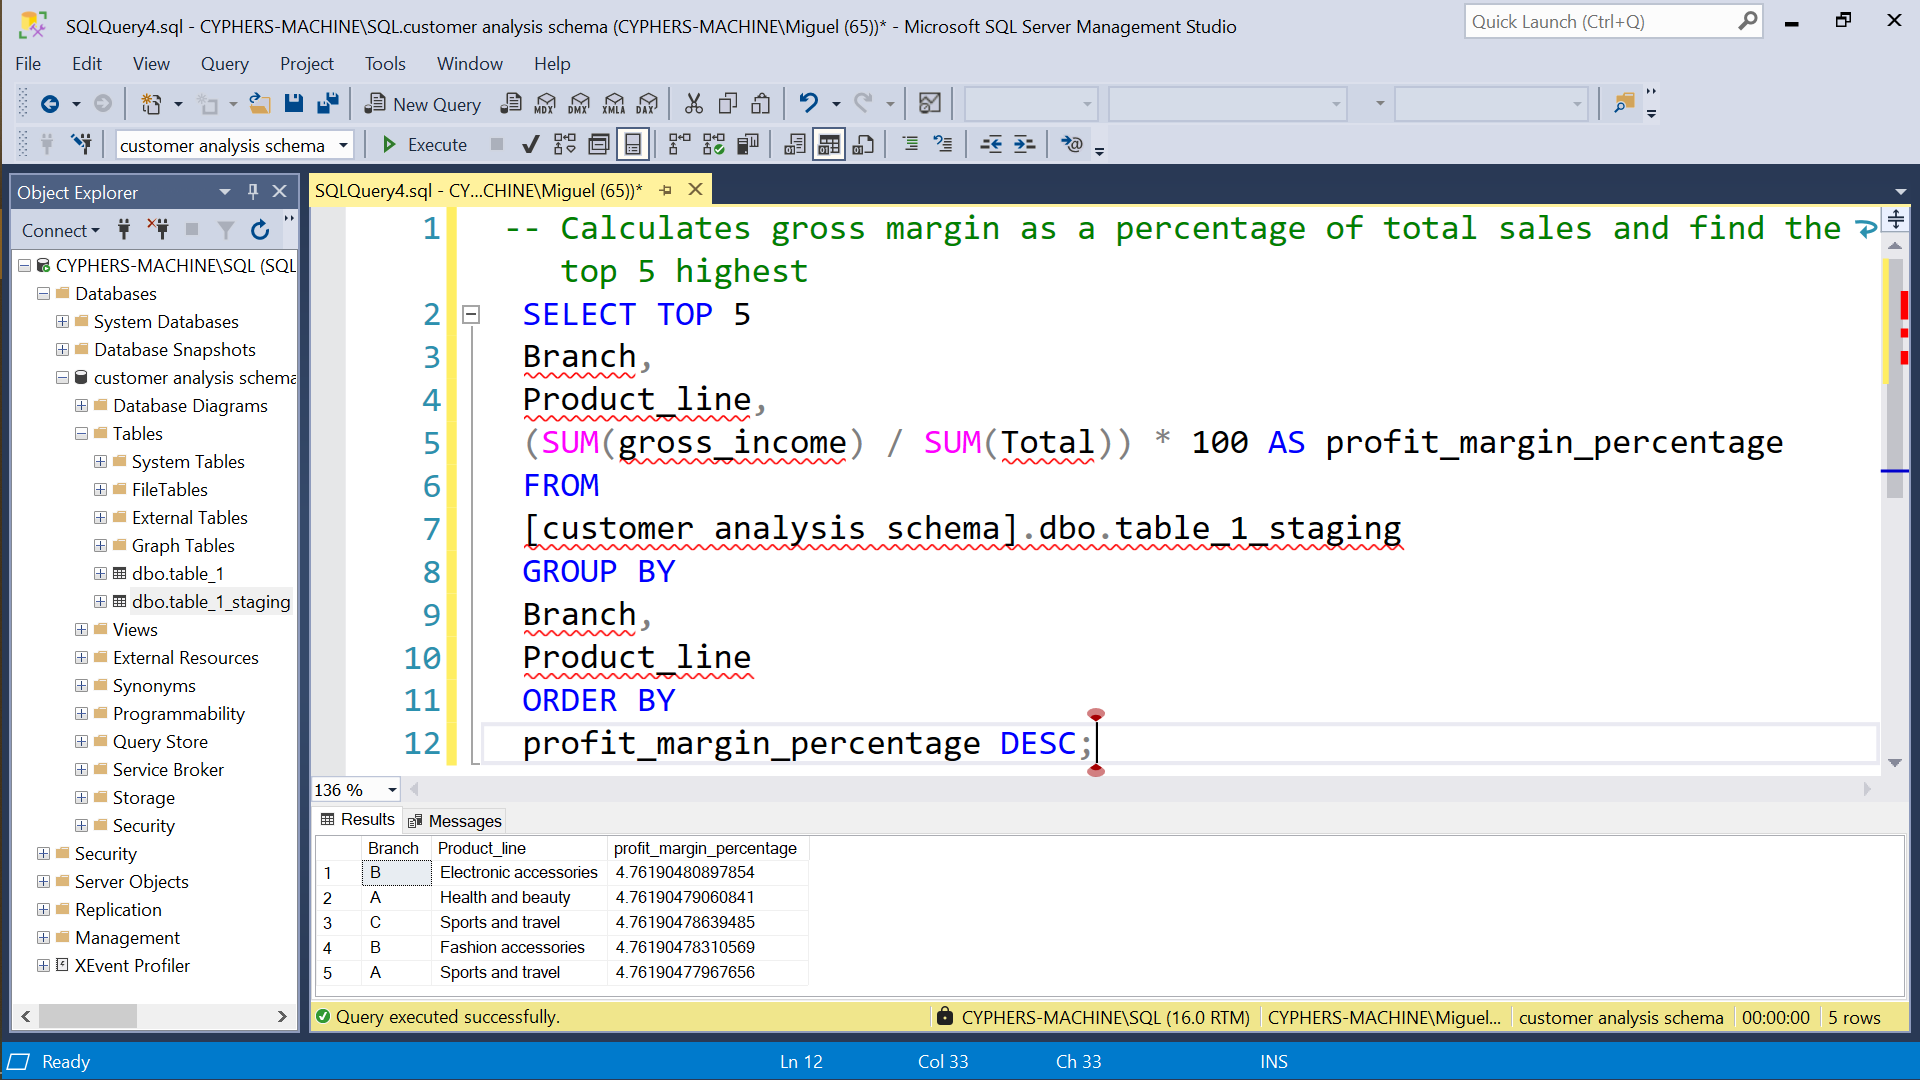

In [10]:
from IPython.display import Image, display

# Path to the image
img_path = '/kaggle/input/mssqlserver/Q3.png'

# Display the image
display(Image(filename=img_path))

[Profit margin per branch and product line viz](https://public.tableau.com/shared/T5QQ37H5B?:display_count=n&:origin=viz_share_link)

Conclusion:

The analysis shows that all product lines and branches have a consistent profit margin percentage of approximately **4.76%**, with no significant variation across branches or product lines. 

This uniformity suggests that the company applies a standardized pricing or cost structure across different categories and locations. As a result, none of the product lines or branches stand out with particularly higher profit margins. Further analysis could focus on identifying ways to increase profitability in specific branches or product lines through cost reduction or pricing optimization.

Fourth question-

4. **How does the payment method impact the average transaction value?**
 - Compare average transaction values across different payment methods to determine if there are significant differences.

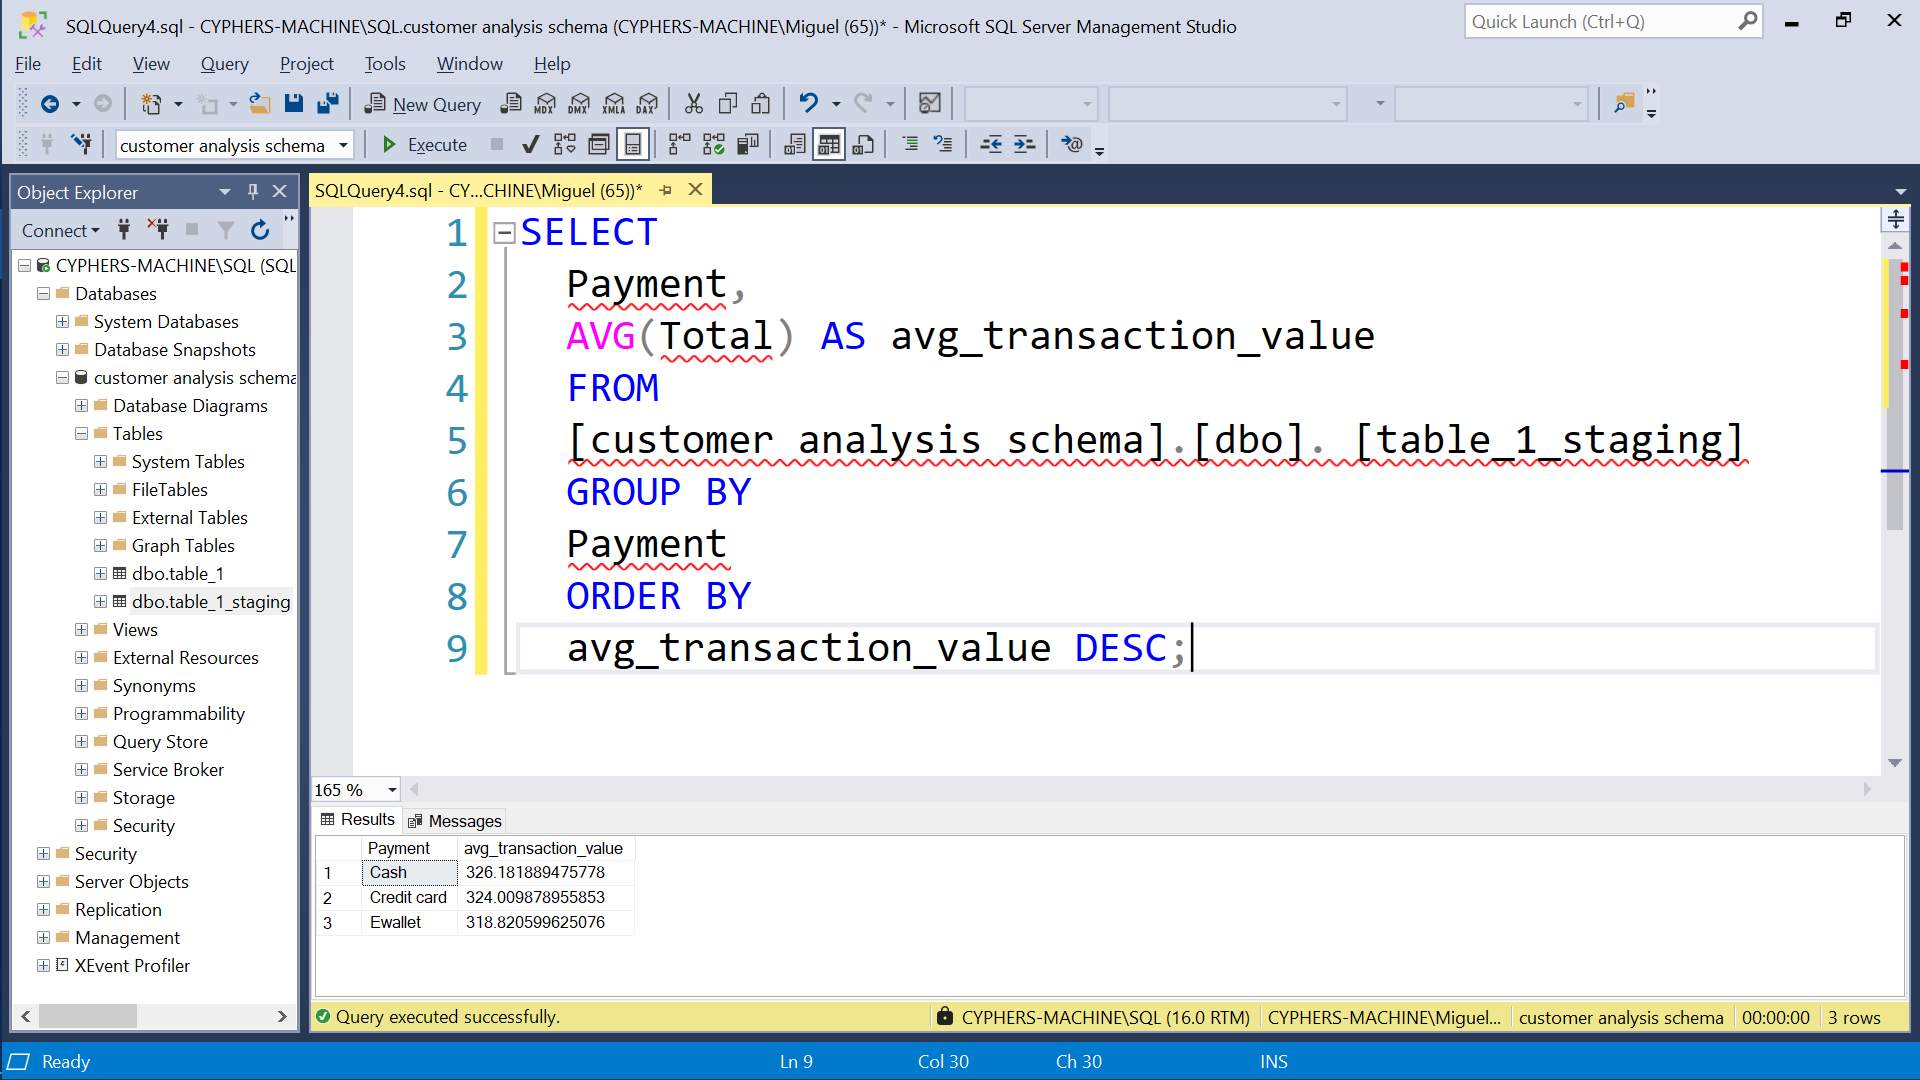

In [11]:
from IPython.display import Image, display

# Path to the image
img_path = '/kaggle/input/mssqlserver/Q4.png'

# Display the image
display(Image(filename=img_path))

[Average Transaction value per payment method viz](https://public.tableau.com/shared/RK4MYW4WW?:display_count=n&:origin=viz_share_link)

Conclusion:

From the results, we can observe that the payment method has a noticeable impact on the average transaction value:

- **Cash** has the highest average transaction value at **326.18**.
- **Credit card** follows closely with an average transaction value of **324.01**.
- **Ewallet** has the lowest average transaction value at **318.82**.

Although the differences are not drastic, cash transactions tend to have slightly higher values compared to credit cards and ewallets. This could suggest that customers paying with cash might be purchasing more expensive items or in larger quantities. Conversely, ewallet users may be making more frequent, smaller purchases. Further analysis could explore additional factors such as customer demographics or product categories to explain these differences.

# Summary:

The analysis of the dataset provides insights into key factors impacting sales, customer satisfaction, profitability, and payment methods.

1. **Sales Trends Over Time by Product Line:**
 - **Conclusion:** 
 - **Sports and Travel** and **Home and Lifestyle** are the top-performing product lines, with **Sports and Travel** peaking in January and **Home and Lifestyle** showing the strongest sales in March.
 - **Health and Beauty** and **Electronic Accessories** exhibited fluctuations, with **Health and Beauty** seeing a notable increase in March and **Electronic Accessories** experiencing a decline over time.
 - **Food and Beverages** and **Fashion Accessories** remained stable, with minor fluctuations in sales.

2. **Highest-Rated Product Categories:**
 - **Conclusion:** 
 - The top-rated product categories are:
 - **Food and Beverages** – Average Rating: 7.11
 - **Fashion Accessories** – Average Rating: 7.03
 - **Health and Beauty** – Average Rating: 7.00
 - These categories receive the highest ratings, indicating strong customer satisfaction. Although **Electronic Accessories** (6.92) and **Sports and Travel** (6.91) are slightly lower, they still maintain competitive ratings.

3. **Profit Margins by Product Line and Branch:**
 - **Conclusion:** 
 - The profit margins for all product lines and branches are consistent at approximately **4.76%**, suggesting a standardized pricing or cost structure across categories and locations. No product line or branch significantly stands out in terms of profitability.

4. **Impact of Payment Method on Average Transaction Value:**
 - **Conclusion:** 
 - **Cash** transactions have the highest average transaction value at **₹326.18**, followed by **Credit Card** at **₹324.01**, and **Ewallet** at **₹318.82**. While the differences are subtle, cash transactions tend to involve slightly larger or more expensive purchases, whereas ewallet users may make smaller, more frequent purchases.

Overall, the analysis highlights strong sales trends in certain product lines, high customer satisfaction in specific categories, consistent profit margins across branches and product lines, and noticeable differences in transaction values based on payment methods.

Thank you for your time

If you have any suggestions to what I should add or edit to this project feel free to comment on it, I will accredit any suggestions if so desired.Any input is appreciated.